In [ ]:
!pip install nltk seaborn wordcloud scikit-learn requests -q


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import requests
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("swan_large_dataset.csv")

print("Dataset Loaded")
print(df.head())

Dataset Loaded
         Date        Platform    Product_Category  \
0  2025-11-17       Instagram        Sofa Cushion   
1  2025-09-18       Instagram  Memory Foam Pillow   
2  2026-02-05       Instagram  Memory Foam Pillow   
3  2025-08-31       Instagram        Sofa Cushion   
4  2025-04-04  Website Review       Comforter Set   

                                        Comment_Text Sentiment_Ground_Truth  
0  Customer service didn't reply when I asked abo...               Negative  
1  I was skeptical but the Memory Foam Pillow is ...               Positive  
2  Great service and the Memory Foam Pillow feels...               Positive  
3  I was skeptical but the Sofa Cushion is very c...               Positive  
4  Finally getting good sleep thanks to Swan's Co...               Positive  


In [ ]:
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

domain_words = {
    'sagging': -3.0,
    'delayed': -2.5,
    'hard': -2.0,
    'smells': -2.5,
    'nightmare': -4.0,
    'unacceptable': -3.5,
    'sinks': -2.5,
    'cheap': -2.5,
    "didn't reply": -3.0,
    "no reply": -3.0
}

sid.lexicon.update(domain_words)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def classify_sentiment(text):

    text_lower = str(text).lower()

    if "didn't reply" in text_lower or "no response" in text_lower:
        return "Negative"

    score = sid.polarity_scores(text_lower)['compound']

    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
df['Predicted_Sentiment'] = df['Comment_Text'].apply(classify_sentiment)

print(df[['Comment_Text','Predicted_Sentiment']].head())

                                        Comment_Text Predicted_Sentiment
0  Customer service didn't reply when I asked abo...            Negative
1  I was skeptical but the Memory Foam Pillow is ...            Positive
2  Great service and the Memory Foam Pillow feels...            Positive
3  I was skeptical but the Sofa Cushion is very c...            Positive
4  Finally getting good sleep thanks to Swan's Co...            Positive


In [ ]:
print("\nMODEL PERFORMANCE REPORT")
print(classification_report(
    df['Sentiment_Ground_Truth'],
    df['Predicted_Sentiment']
))


MODEL PERFORMANCE REPORT
              precision    recall  f1-score   support

    Negative       0.94      0.88      0.91       426
     Neutral       0.79      0.59      0.68       235
    Positive       0.87      1.00      0.93       589

    accuracy                           0.88      1250
   macro avg       0.87      0.82      0.84      1250
weighted avg       0.88      0.88      0.88      1250



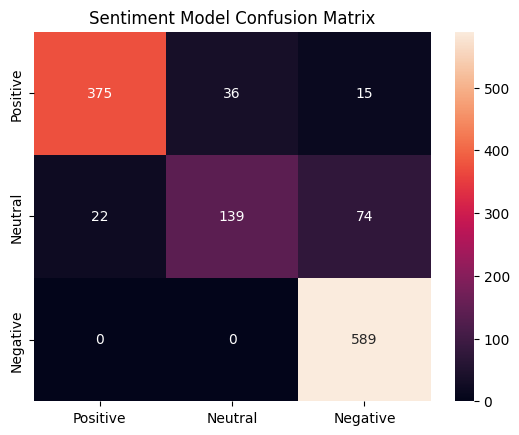

In [ ]:
cm = confusion_matrix(
    df['Sentiment_Ground_Truth'],
    df['Predicted_Sentiment']
)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Positive','Neutral','Negative'],
            yticklabels=['Positive','Neutral','Negative'])

plt.title("Sentiment Model Confusion Matrix")
plt.show()

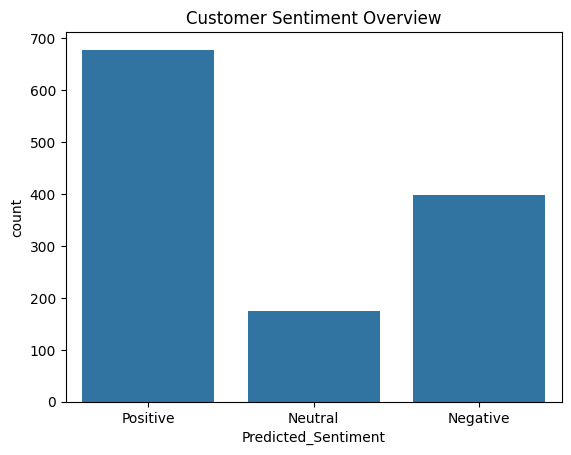

In [ ]:
sns.countplot(
    x='Predicted_Sentiment',
    data=df,
    order=['Positive','Neutral','Negative']
)
plt.title("Customer Sentiment Overview")
plt.show()

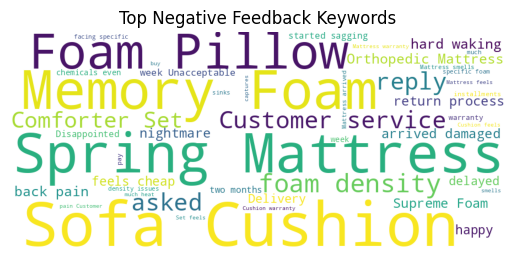

In [ ]:
negative_text = " ".join(
    df[df['Predicted_Sentiment']=="Negative"]['Comment_Text']
)

wc = WordCloud(width=900,height=400,background_color="white")
wc.generate(negative_text)

plt.imshow(wc)
plt.axis('off')
plt.title("Top Negative Feedback Keywords")
plt.show()

In [ ]:
print("\nTop Complained Products")
print(
    df[df['Predicted_Sentiment']=="Negative"]
    ['Product_Category']
    .value_counts()
    .head(5)
)

print("\nAverage Sentiment by Product")
print(
    df.groupby('Product_Category')
    ['Predicted_Sentiment']
    .value_counts(normalize=True)
)


Top Complained Products
Product_Category
Sofa Cushion           83
Spring Mattress        71
Memory Foam Pillow     70
Comforter Set          60
Orthopedic Mattress    58
Name: count, dtype: int64

Average Sentiment by Product
Product_Category     Predicted_Sentiment
Comforter Set        Positive               0.719626
                     Negative               0.280374
Memory Foam Pillow   Positive               0.448454
                     Negative               0.360825
                     Neutral                0.190722
Orthopedic Mattress  Positive               0.541463
                     Negative               0.282927
                     Neutral                0.175610
Sofa Cushion         Positive               0.454545
                     Negative               0.377273
                     Neutral                0.168182
Spring Mattress      Positive               0.436364
                     Negative               0.322727
                     Neutral              

In [ ]:
negative_comments = df[
    df['Predicted_Sentiment']=="Negative"
]['Comment_Text'].tolist()

text_blob = " ".join(negative_comments)